In [1]:
%pylab inline
%matplotlib inline

from IPython.display import display, Markdown

from datetime import datetime, timedelta
from os.path import join
import logging

import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# configure logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# create console handler with a higher log level
ch = logging.StreamHandler()
#ch.setLevel(logging.INFO)
formatter = logging.Formatter(fmt='%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%m/%d/%Y %I:%M:%S')
ch.setFormatter(formatter)

# add handler
logger.addHandler(ch)

In [3]:
PROJECT_ROOT = 'C:/Users/t-mibarg/Documents/Source/Repos/face-it/'
IMG_PATH = 'painter/examples/guy.jpg'
XML_PATH = 'painter/data/haarcascade_frontalface_alt.xml'

In [4]:
# Dependecies imports
sys.path.extend([PROJECT_ROOT,])
from painter.saliency.mrf import *
from painter.saliency.saliency_map import api as saliency_map
from painter.image_preprocessor import ImagePreprocessor

## Preprocess

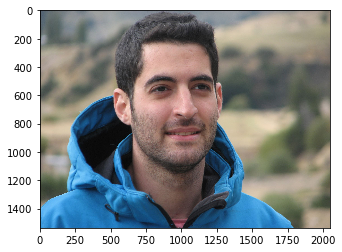

In [5]:
image_path = join(PROJECT_ROOT, IMG_PATH)

# read image
image = cv2.imread(image_path, cv2.COLOR_BGR2RGB) # misc.imread(image_path)
plt.imshow(misc.imread(image_path))

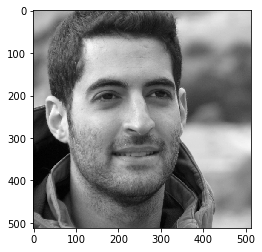

In [6]:
# apply Or's preprocessing
ip = ImagePreprocessor(image, xml=join(PROJECT_ROOT, XML_PATH))
processed_image = ip.image_cropper()
plt.imshow(processed_image, cmap='gray')

## Generate MRF

In [7]:
n, m = processed_image.shape
g = build_grid_graph(n, m, processed_image, np.zeros((n, m)))

In [9]:
maps = saliency_map(im=processed_image, is_markMaxima=False)

error: ..\..\..\modules\imgproc\src\color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function cv::ipp_cvtColor


## graveyard

In [ ]:
#gray_image = rgb2gray(image)
#plt.imshow(gray_image, cmap='gray')

# observed matrix
obs_mat = np.ones((1536, 2048))
obs_mat[500:900,500:900] = np.zeros((400, 400))

# obscured image
obs_image = gray_image.copy()
obs_image[500:900,500:900] = np.zeros((400, 400))
plt.imshow(obs_image, cmap='gray')

In [ ]:
# run pairwise mrf
res = api(image, obs_mat, curve='line', iterations=2, verbose=True, msg_method='norm')
plt.imshow(res, cmap='gray')

In [ ]:
image.shape

In [ ]:
# cut image to square
largest_powof2 = min(int(math.log(gray_image.shape[0], 2)), int(math.log(gray_image.shape[1], 2)))
margins = ((gray_image.shape[0] - pow(2, largest_powof2)) / 2, (gray_image.shape[1] - pow(2, largest_powof2)) / 2)
image_segment = gray_image[margins[0]:margins[0] + pow(2, largest_powof2), margins[1]:margins[1] + pow(2, largest_powof2)]
observed_segment = obs_mat[margins[0]:margins[0] + pow(2, largest_powof2), margins[1]:margins[1] + pow(2, largest_powof2)]
n, m = image_segment.shape

plt.imshow(image_segment, cmap='gray')

In [ ]:
# obscured image segment
obs_image_segment = np.multiply(image_segment, observed_segment)
plt.imshow(obs_image_segment, cmap='gray')